In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

## Setup Pytrend Library

In [11]:
pytrends = TrendReq(hl = 'en-US',tz = 360)
keyword = 'computer'

## Data Request

In [16]:
pytrends.build_payload([keyword],timeframe='today 12-m',cat = 0,geo='',gprop='')


## Country Wise Interest

In [28]:
range_data = pytrends.interest_by_region()
range_data = range_data.sort_values(by = keyword,ascending = False).head(5)

C:\Users\k\AppData\Local\Temp\ipykernel_2604\1545026432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = range_data[keyword],y=range_data.index,palette='Blues_d')


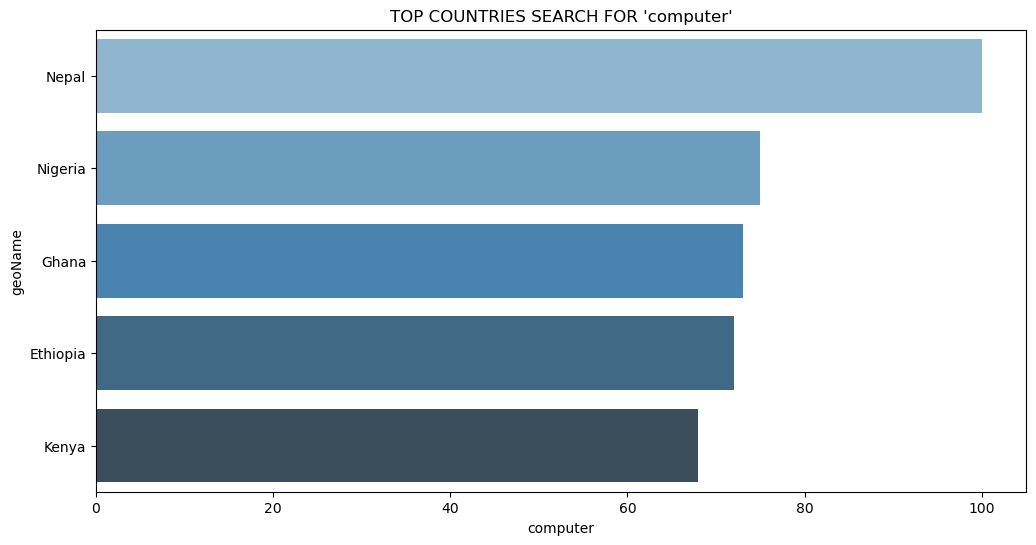

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x = range_data[keyword],y=range_data.index,palette='Blues_d')
plt.title(f"TOP COUNTRIES SEARCH FOR '{keyword}'")
plt.xlabel  = ('Interest')
plt.ylabel = ('Country')
plt.show()

## World Map

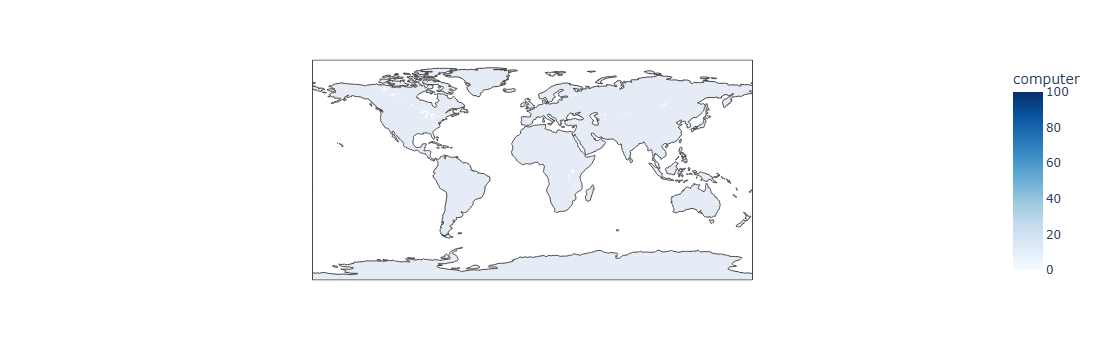

In [43]:
range_data = pytrends.interest_by_region()
fig = px.choropleth(range_data,
                   locations='computer',
                   locationmode='country names',
                   color=keyword,
                   color_continuous_scale='Blues')

fig.show()

## Time Wise Interest

C:\Users\k\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



TypeError: 'str' object is not callable

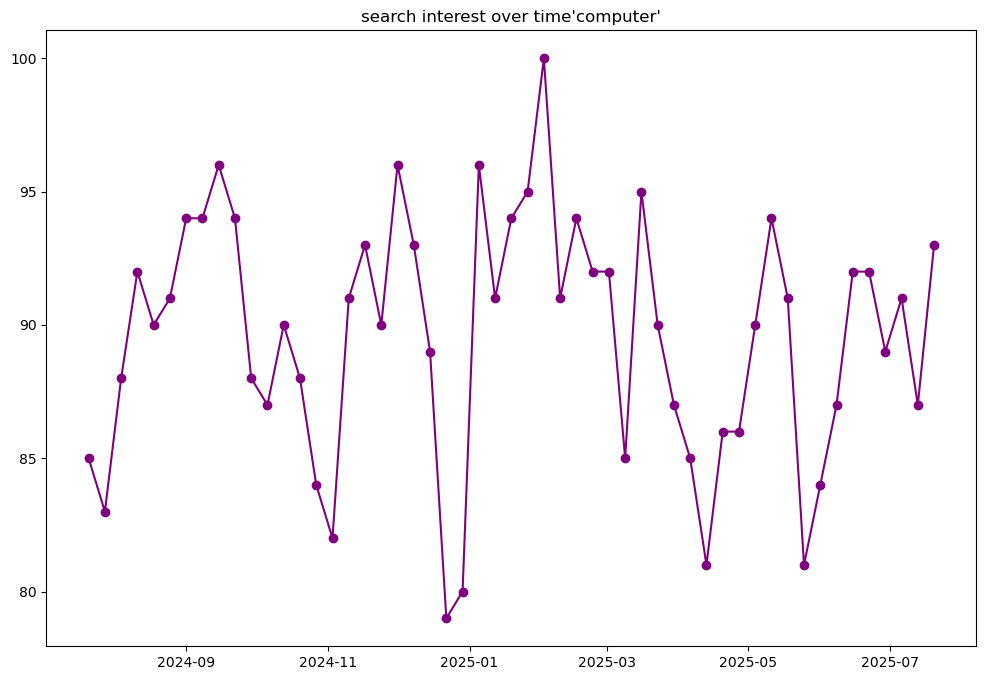

In [46]:
time_df = pytrends.interest_over_time()
plt.figure(figsize=(12,8))
plt.plot(time_df.index,time_df[keyword],marker = 'o',color = 'purple')
plt.title(f"search interest over time'{keyword}'")
plt.xlabel("Date")
plt.ylabel('Interest')
plt.grid(True)
plt.show()

## Multiplr Keywords Compare

In [49]:
kw_list = ['mouse','keyboard','printer']
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

In [ ]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,7))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)
